In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, f1_score

In [2]:
# import the training and test datasets
xTrain = pd.read_csv("preprocess/preprocessed_data/xTrain.csv")
yTrain = pd.read_csv("preprocess/preprocessed_data/yTrain_discrete.csv")
xTest = pd.read_csv("preprocess/preprocessed_data/xTest.csv")
yTest = pd.read_csv("preprocess/preprocessed_data/yTest_discrete.csv")

In [11]:
# KNN, optimal: n = 9, metric = manhattan
knn = KNeighborsClassifier(n_neighbors=9, metric="manhattan")

knn.fit(xTrain, yTrain.values.ravel())
proba_knn = knn.predict_proba(xTest)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(yTest, proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [12]:
# Random Forest, optimal: 
rf = RandomForestClassifier(
        bootstrap=True, 
        max_depth=4, 
        min_samples_leaf=4, 
        min_samples_split=10, 
        n_estimators=100
    )

rf.fit(xTrain, yTrain.values.ravel())
proba_rf = rf.predict_proba(xTest)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(yTest, proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [5]:
# Support Vector Machine, optimal:
svc = SVC(kernel="rbf", C=10)

svc.fit(xTrain, yTrain.values.ravel())
proba_svc = svc.decision_function(xTest)

fpr_svc, tpr_svc, thresholds_svc = roc_curve(yTest, proba_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

In [6]:
# Extreme Gradiant Boosting, optimal:
xgb= XGBClassifier(max_depth=5, learning_rate=0.01, subsample=0.6)

xgb.fit(xTrain, yTrain.values.ravel())
proba_xgb = xgb.predict_proba(xTest)[:, 1]

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(yTest, proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

In [9]:
# Logistic Regression, optimal:
lr = LogisticRegression()

lr.fit(xTrain, yTrain.values.ravel())
proba_lr = lr.predict_proba(xTest)[:, 1]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(yTest, proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

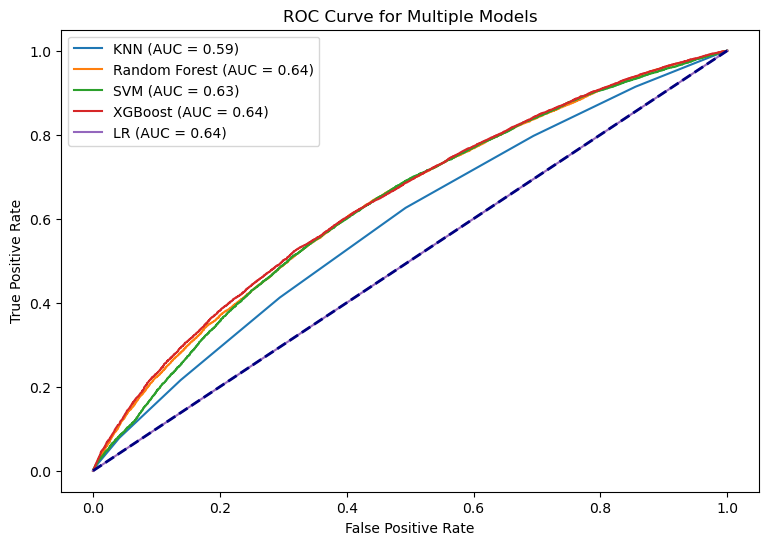

In [15]:
# draw ROC curves for the 5 models
fprs = [fpr_knn, fpr_rf, fpr_svc, fpr_xgb, fpr_lr]
tprs = [tpr_knn, tpr_rf, tpr_svc, tpr_xgb, fpr_lr]
roc_aucs = [roc_auc_knn, roc_auc_rf, roc_auc_svc, roc_auc_xgb, roc_auc_lr]

labels = ["KNN", "Random Forest", "SVM", "XGBoost", "LR"]

plt.figure(figsize=(9, 6))

for i in range(len(fprs)):
    plt.plot(fprs[i], tprs[i], label='{} (AUC = {:.2f})'.format(labels[i], roc_aucs[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiple Models")
plt.legend()

plt.show()